<a href="https://colab.research.google.com/github/rafapedra/Data_Science_Projects/blob/master/Projeto_Data_Science_Awari_Rafael_Pedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introdução**

As produções cinematográficas estão no auge da tecnologia, orçamento e alcance das populações ao redor do mundo, porém será que há alguma relação entre os altos orçamentos, tecnologia e uma boa avaliação ? Este é o propósito desta análise, entender, explicar, explorar uma base com quatro décadas catalogadas pela IMDB (Internet Movie Database), mais popular base de dados relacionada ao tema. 

## **Análise Exploratória dos Dados**


**Origem dos dados**


A origem dos dados deu-se de forma secundária. A escolha do dataset foi realizada através de uma pesquisa do tema na plataforma Kaggle, referência: *https://www.kaggle.com/datasets/danielgrijalvas/movies*


**Conjunto de dados**

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Para mostrar todas as colunas do dataset
pd.set_option('max_columns', None)

In [2]:
# Importando arquivo de carga
movies = pd.read_csv('https://raw.githubusercontent.com/rafapedra/rafapedra/main/movies.csv')
dfmovies = movies.copy()

**Identificando e conhecendo a base de dados**

In [3]:
# Verificando o dataset

movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Identificando os tipos de variáveis
display(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


None

**Dicionário de Dados**

| **Variável** | **Descrição**         |
|:--------------------:|:---------------------:| 
|name                  |Nome do filme | 
|rating                |Classificação indicativa
|genre                 |Gênero                       | 
|year                  |Ano de lançamento                | 
|released              |Data de lançamento|
|votes                 |Quantidade de votos| 
|score                 |Nota
|director              |Diretor                |
|writer                |Escritor          |
|star                  |Artista principal| 
|country               |País de origem | 
|budget                |Orçamento| 
|gross                 |Receita| 
|company               |Estúdio         |
|runtime               |Duração|

**Traduzindo colunas para o português - BR**

In [5]:
# Traduzindo colunas para o português
dfmovies = movies.rename(columns={
    'name' : 'Nome do Filme',
    'rating': 'Classificação Indicativa',
    'genre':'Gênero',
    'year':'Ano de Lançamento',
    'released':'Data de Lançamento',
    'votes':'Quantidade de Votos',
    'director':'Diretor',
    'writer': 'Escritor',
    'star':'Artista Principal',
    'country':'País de Origem',
    'budget': 'Orçamento',
    'gross': 'Receita',
    'company': "Estúdio",
    'runtime': 'Duração'
})

In [6]:
# Verificando tradução
dfmovies.head(5)

,Nome do Filme,Classificação Indicativa,Gênero,Ano de Lançamento,Data de Lançamento,score,Quantidade de Votos,Diretor,Escritor,Artista Principal,País de Origem,Orçamento,Receita,Estúdio,Duração
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Identificando escala de pontuação do score
dfmovies.score.unique()

array([8.4, 5.8, 8.7, 7.7, 7.3, 6.4, 7.9, 8.2, 6.8, 7. , 6.1, 5.3, 7.1,
       7.2, 6.6, 6.9, 6.5, 6.7, 5. , 6.2, 5.4, 6.3, 6. , 5.9, 7.5, 4.8,
       4.6, 5.1, 8.3, 4.2, 5.5, 8.1, 4.7, 5.2, 7.4, 4. , 4.3, 7.6, 4.9,
       3.4, 7.8, 5.6, 2.7, 2.9, 4.4, 8. , 5.7, 3.7, 3.6, 3.9, 3.5, 3.8,
       4.1, 3. , 4.5, 8.5, 3.2, 2.6, 2.2, 3.1, 8.6, 8.9, 9.3, 8.8, 3.3,
       2.5, 2.3, 2.1, 1.9, 2.4, 2.8, 9. , nan])

In [8]:
# Análise de correlação entre fatores
dfmovies.corr()

,Ano de Lançamento,score,Quantidade de Votos,Orçamento,Receita,Duração
Ano de Lançamento,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
Quantidade de Votos,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
Orçamento,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
Receita,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
Duração,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


**Limpeza da base de dados**

In [9]:
# Eliminando nulos do dataframe
dfmovieslimpo = dfmovies.dropna()

In [10]:
dfmovieslimpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do Filme             5421 non-null   object 
 1   Classificação Indicativa  5421 non-null   object 
 2   Gênero                    5421 non-null   object 
 3   Ano de Lançamento         5421 non-null   int64  
 4   Data de Lançamento        5421 non-null   object 
 5   score                     5421 non-null   float64
 6   Quantidade de Votos       5421 non-null   float64
 7   Diretor                   5421 non-null   object 
 8   Escritor                  5421 non-null   object 
 9   Artista Principal         5421 non-null   object 
 10  País de Origem            5421 non-null   object 
 11  Orçamento                 5421 non-null   float64
 12  Receita                   5421 non-null   float64
 13  Estúdio                   5421 non-null   object 
 14  Duração 

In [11]:
# Revisando correlação entre fatores com nulos excluídos
dfmovieslimpo.corr()

,Ano de Lançamento,score,Quantidade de Votos,Orçamento,Receita,Duração
Ano de Lançamento,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
Quantidade de Votos,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
Orçamento,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
Receita,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
Duração,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


**Criação de colunas e dataframes auxiliares**

## Perguntas de negócio a serem respondidas

*   Existe alguma relação entre orçamento e avaliação (score) dos filmes ? 

Analisando os dados, não podemos considerar a correlação entre orçamento e score.  O valor de correlação é desprezível, 0.072 


*   Qual gênero trouxe mais receita em média?

O gênero que trouxe maior receita foi o familiar.

In [12]:
# Agrupando por gênero e calculando a média de receita, classificando e indexando para melhor visualização
dfmovieslimpo.groupby(['Gênero']).agg({'Receita':np.mean}).sort_values(by='Receita',ascending=False).reset_index()

,Gênero,Receita
0,Family,5.185831e+08
1,Animation,2.811044e+08
2,Action,1.680232e+08
3,Adventure,1.332682e+08
4,Mystery,1.178877e+08
5,Biography,6.139527e+07
6,Drama,6.036914e+07
7,Comedy,5.916766e+07
8,Horror,5.681695e+07
9,Crime,5.016958e+07


*   Qual gênero trouxe menos receita em média?

O gênero que trouxe menos receita em média foi de faroeste (western)



---



*   Qual gênero trouxe avaliações mais altas ?
Observando os dados, vê-se que o gênero biografia foi o mais bem avaliado, em média


In [13]:
dfmovieslimpo.groupby(['Gênero']).agg({'score':np.mean}).sort_values(by='score',ascending=False).reset_index()

,Gênero,score
0,Biography,7.088103
1,Drama,6.721437
2,Animation,6.690614
3,Crime,6.689223
4,Family,6.675000
5,Mystery,6.670588
6,Romance,6.580000
7,Sci-Fi,6.350000
8,Adventure,6.268196
9,Action,6.247350


*   Qual gênero trouxe avaliações mais baixas ?
Para esta pergunta, gostaria de relacionar os 3 últimos colocados. Horror, Thriller e Faroeste


*   Existe correlação entre duração do filme e score ?
Existe uma correlação muito fraca a qual não devemos considerar. 0.414068



*   Existe correlação entre receita e duração do filme ? 
Existe uma correlação muito fraca e não devemos considerá-la. 0.275796


*   Existe correlação entre as colunas da base movies ?
Sim, temos duas correlações que chamaram um pouco mais a atenção: *score e quantidade de votos 0.614751*, *quantidade de votos e receita* 0.614751 e *orçamento e receita* 0.740247



*   Qual estúdio teve maior arrecadação ao longo dos anos ? 
Warner Bros foi o estúdio que mais arrecadou
 

In [15]:
dfmovieslimpo.describe()

,Ano de Lançamento,score,Quantidade de Votos,Orçamento,Receita,Duração
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [33]:
Top5_Estudios = dfmovieslimpo.groupby(
    'Estúdio'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

In [34]:
Top5_Estudios

,Estúdio,Receita
0,Warner Bros.,5.461096e+10
1,Universal Pictures,5.124111e+10
2,Columbia Pictures,4.235643e+10
3,Paramount Pictures,4.002170e+10
4,Twentieth Century Fox,3.954257e+10


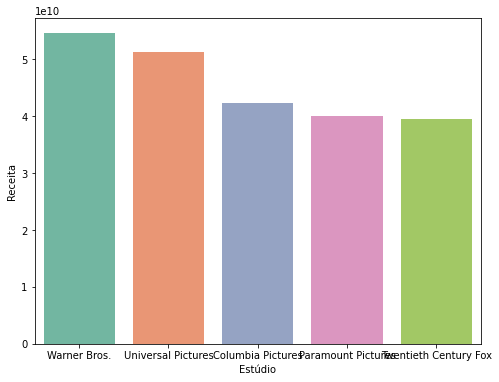

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(data=Top5_Estudios, x='Estúdio', y='Receita', palette='Set2');

##Conclusões finais#

Após análise dos dados obtidos, conseguimos responder às perguntas idealizadas de negócio, permitindo uma compreensão maior e clareza utilizando Ciência de Dados e cultura Data Driven caso fosse necessária a escolha de investimento por gênero, score e ou qualquer outro parâmetro da base de dados. 

Um agradecimento especial ao Time Awari que acompanhou os trabalhos, turma e mentores.